In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
import zipfile

zip_path = "creditcardfraud.zip"  
csv_path = "creditcard.csv"

# Check if the CSV file is already extracted
if not os.path.exists(csv_path):
    if os.path.exists(zip_path):
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall()  # Extract in the same directory
        print("Extraction completed.")
    else:
        print(f"Error: Neither '{csv_path}' nor '{zip_path}' found. Please download the dataset and place it in the working directory.")

In [3]:
# Load dataset (Credit Card Fraud Detection dataset from Kaggle)
data = pd.read_csv("creditcard.csv")

In [4]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Series([], dtype: int64)


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")

Missing values per column:
No missing values found.


In [7]:
# Check class distribution
print("Class distribution:")
print(data['Class'].value_counts())

Class distribution:
0    284315
1       492
Name: Class, dtype: int64


In [8]:
# Check class distribution
class_counts = data['Class'].value_counts()
print("Class distribution:")
print(class_counts)

Class distribution:
0    284315
1       492
Name: Class, dtype: int64


In [9]:
# Handling class imbalance using undersampling
fraud_samples = data[data['Class'] == 1]
non_fraud_samples = data[data['Class'] == 0].sample(n=len(fraud_samples), random_state=42)
balanced_data = pd.concat([fraud_samples, non_fraud_samples])

In [10]:
# Data preprocessing
scaler = StandardScaler()
balanced_data['Amount'] = scaler.fit_transform(balanced_data[['Amount']])

In [11]:
# Remove 'Time' column as it's not needed
balanced_data = balanced_data.drop(columns=['Time']) 

In [12]:
# Splitting data into train and test sets
X = balanced_data.drop(columns=['Class'])
y = balanced_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [15]:
# Evaluate Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        99
           1       0.96      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



Confusion Matrix:


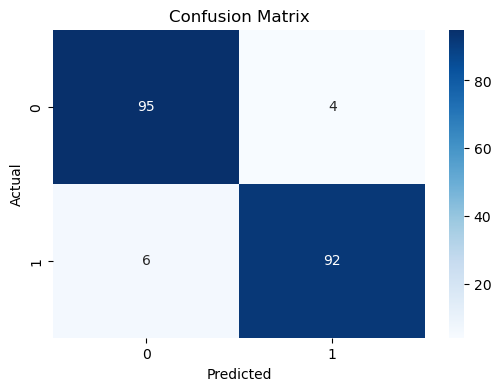

In [16]:
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# ROC-AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

ROC-AUC Score: 0.9881


In [18]:
# Feature importance visualization
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

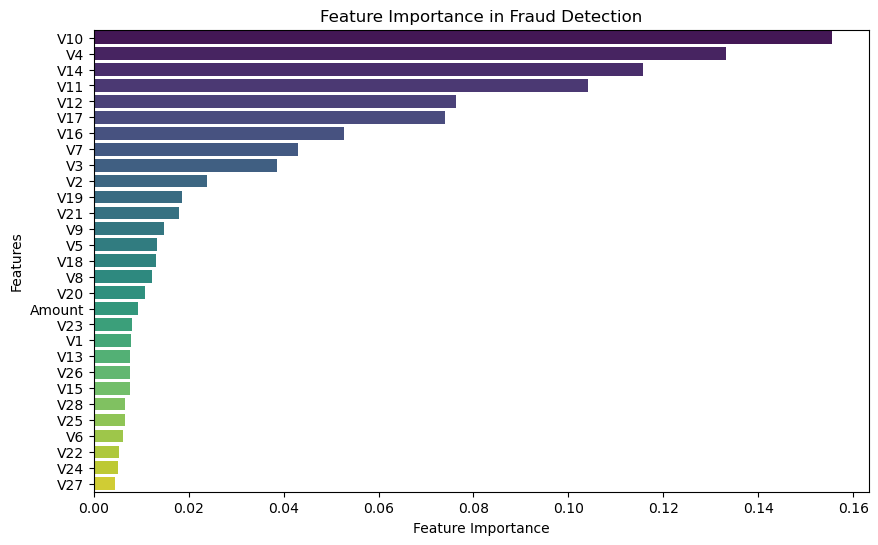

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Fraud Detection")
plt.show()
